Visualizations Technique

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [ ]:
df = pd.read_csv("data.csv")
df.head()

,id,last_name,credit_score,country,gender,age,years_customer,balance_euros,num_products,has_credit_card,is_active,salary_euros,retained
0,15634602,Hargrave,619,Switzerland,f,42,2,0.00,1,1,1,101348.88,0
1,15647311,Hill,608,Austria,f,41,1,83807.86,1,0,1,112542.58,1
2,15619304,Onio,502,Switzerland,f,42,8,159660.80,3,1,0,113931.57,0
3,15701354,Boni,699,Switzerland,f,39,1,0.00,2,0,0,93826.63,1
4,15737888,Mitchell,850,Austria,f,43,2,125510.82,1,1,1,79084.10,1


How to add another column. Add another column named churn, such that when "retained" column is 0, then "churn" is 1 and vice versa

In [ ]:
df["churn"] = df["retained"].apply(lambda x:1 if x==0 else 0)
df.drop("retained",axis=1, inplace=True) #replace "churn" with "retained"
df.head()

,id,last_name,credit_score,country,gender,age,years_customer,balance_euros,num_products,has_credit_card,is_active,salary_euros,churn
0,15634602,Hargrave,619,Switzerland,f,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Austria,f,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,Switzerland,f,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,Switzerland,f,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Austria,f,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df["churn"].value_counts() #you can use value counts to see if target column is balanced.


,count
churn,
0,7963
1,2037


Text(0.5, 1.0, 'churned vrs retained')

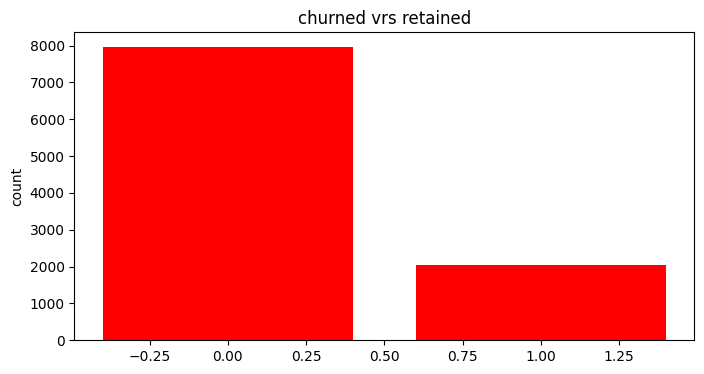

In [ ]:
#now visualize the imbalance # following codes enables you to give title, change with and color of bars, makes your bars more informative
target_val = df["churn"].value_counts()

x = target_val.index
y = target_val.values

fig = plt.figure(figsize = (8, 4))

plt.bar(x, y, color='red', width = 0.8)
plt.ylabel("count")
plt.title("churned vrs retained")

#when you use seaborn, then you don't need all that labelling

<Axes: xlabel='churn', ylabel='count'>

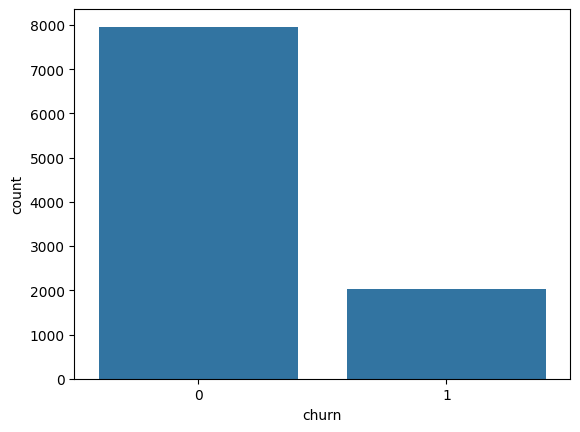

In [ ]:
sns.barplot(df["churn"].value_counts())

In [ ]:
#demonstrate a column's portions using a piechart and a barplot

<Axes: xlabel='country', ylabel='count'>

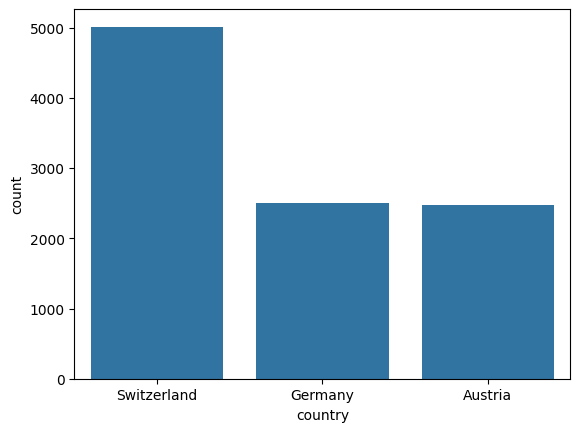

In [ ]:
sns.barplot(df["country"].value_counts())


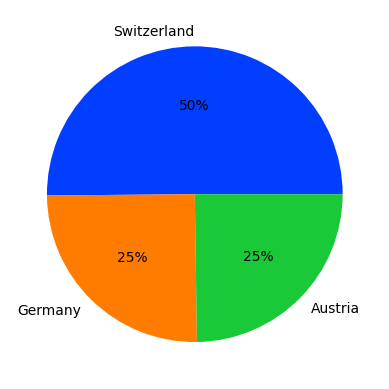

In [ ]:
#declaring data
data = df["country"].value_counts().values
keys = df["country"].value_counts().index

#define Seaborn color palette to use
palette_color = sns.color_palette('bright')

#plotting data on chart
plt.pie(data, labels=keys, colors=palette_color, autopct= '%.0f%%')

#displaying chart
plt.show

#how to pop out 'explode' part if the chart
explode= []

<Axes: >

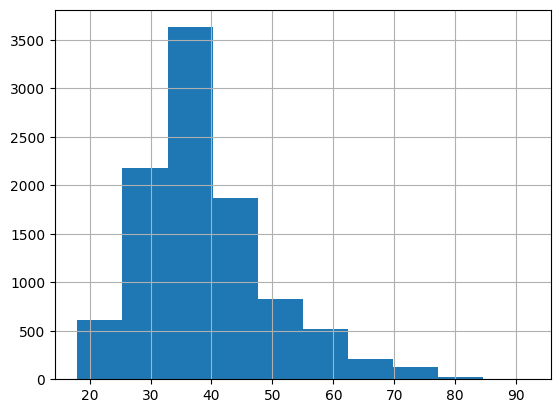

In [ ]:
#histogram from pandas
df["age"].hist()

<Axes: >

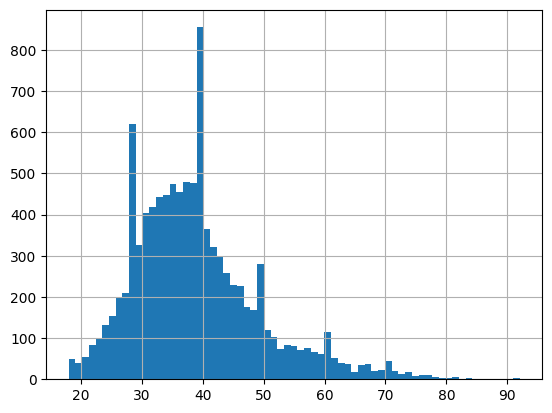

In [ ]:
#another show, with a specific no.of bins
df["age"].hist(bins="auto")

<Axes: xlabel='age', ylabel='Count'>

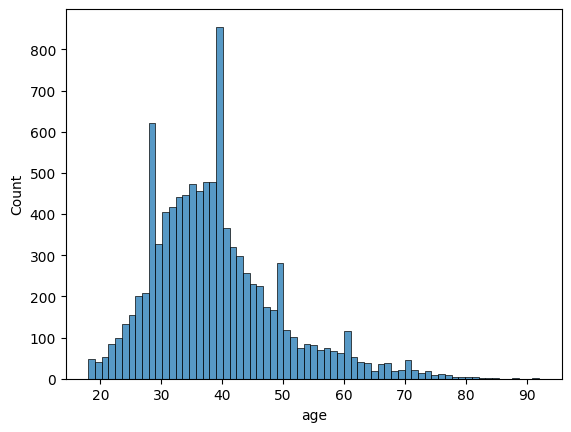

In [ ]:
#histogram from seaborn
sns.histplot(data=df, x="age")

<Axes: >

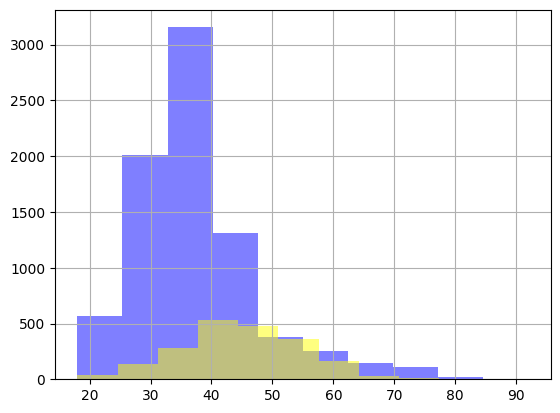

In [ ]:
df[df["churn"]==0]["age"].hist(bins=10,color="blue" ,alpha=.5)
df[df["churn"]==1]["age"].hist(bins=10,color="yellow" ,alpha=.5)
#you can change bins=auto for more details
#the histogram shows that "age" is a good feature to predict the churn rate

<Axes: >

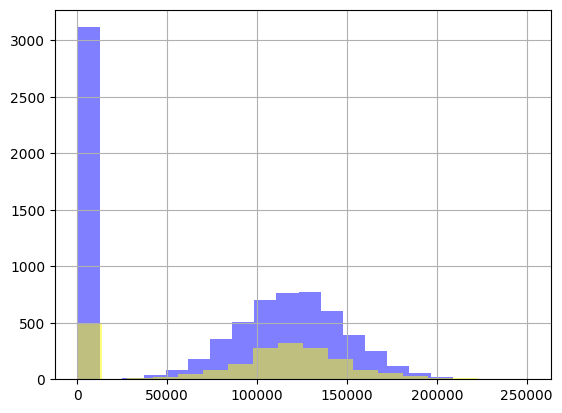

In [ ]:
df[df["churn"]==0]["balance_euros"].hist(bins='auto',color="blue" ,alpha=.5)
df[df["churn"]==1]["balance_euros"].hist(bins='auto',color="yellow" ,alpha=.5)



<Axes: >

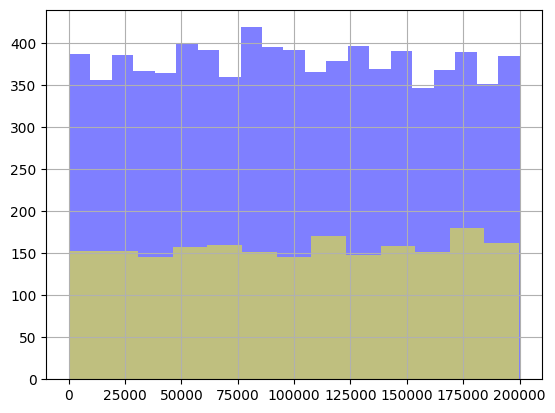

In [ ]:
df[df["churn"]==0]["salary_euros"].hist(bins='auto',color="blue" ,alpha=.5)
df[df["churn"]==1]["salary_euros"].hist(bins='auto',color="yellow" ,alpha=.5)


Group by Function

In [ ]:
#finding the average salary by country
df.groupby("country")["salary_euros"].mean()

,salary_euros
country,
Austria,99440.572281
Germany,101113.435102
Switzerland,99899.180814


In [ ]:
#finding average salaries and balance euros by country
df.groupby("country")[["salary_euros","balance_euros"]].mean()

,salary_euros,balance_euros
country,,
Austria,99440.572281,61818.147763
Germany,101113.435102,119730.116134
Switzerland,99899.180814,62092.636516


In [ ]:
#finding average of all numerical features by the country
df.groupby("gender")[["salary_euros","balance_euros"]].mean()


,salary_euros,balance_euros
gender,,
f,100601.541382,75659.369139
m,99664.576931,77173.974506
